<img src="https://docs.actable.ai/_images/logo.png" style="object-fit: cover; max-width:100%; height:300px;" />

# AAIForecastTask

This notebook is an example on how you can run a forecast automatically with
[Actable AI](https://actable.ai)

For this example we will we will try to predict the stock prices of Tesla in the\
near future.

For this example the dataset we are going to use is the [Tesla Stock Price Dataset](https://www.kaggle.com/datasets/timoboz/tesla-stock-data-from-2010-to-2020)

### Imports

This part simply imports the python modules.
Last line imports the ForecastTask from actableai

In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

from actableai import AAIForecastTask

### Importing the data

This part imports the data.

In [2]:
df = pd.read_csv("https://raw.githubusercontent.com/Actable-AI/public-datasets/master/TSLA.csv")
df = df.tail(200)
df

,Date,Open,High,Low,Close,Adj Close,Volume
2216,2019-04-18,271.230011,274.839996,269.750000,273.260010,273.260010,5876300
2217,2019-04-22,269.000000,269.679993,262.480011,262.750000,262.750000,12147100
2218,2019-04-23,260.149994,265.600006,255.750000,263.899994,263.899994,10943900
2219,2019-04-24,263.850006,265.320007,258.000000,258.660004,258.660004,10727500
2220,2019-04-25,255.000000,259.000000,246.070007,247.630005,247.630005,21849400
...,...,...,...,...,...,...,...
2411,2020-01-28,568.489990,576.809998,558.080017,566.900024,566.900024,11788500
2412,2020-01-29,575.690002,589.799988,567.429993,580.989990,580.989990,17801500
2413,2020-01-30,632.419983,650.880005,618.000000,640.809998,640.809998,29005700
2414,2020-01-31,640.000000,653.000000,632.520020,650.570007,650.570007,15719300


### Calling Actable AI task

This part is the call to the ActableAI forecasting analysis.\
To learn more about the available parameters you can consult the [API Documentation](https://lib.actable.ai/actableai.tasks.html#actableai.tasks.forecast.AAIForecastTask.run)

In [ ]:
result = AAIForecastTask().run(
    df=df,
    prediction_length=20,
    date_column="Date",
    predicted_columns=["Close"]
)
result

### Evaluation of the generated model

In this part we take a look at the metrics created by the model on the validation set.\
The validation set is created internally so you dont need to specify it.

/home/mehdi/actableai-lib/venv/lib/python3.7/site-packages/ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # This is added back by InteractiveShellApp.init_path()


<AxesSubplot:xlabel='Date', ylabel='Close'>

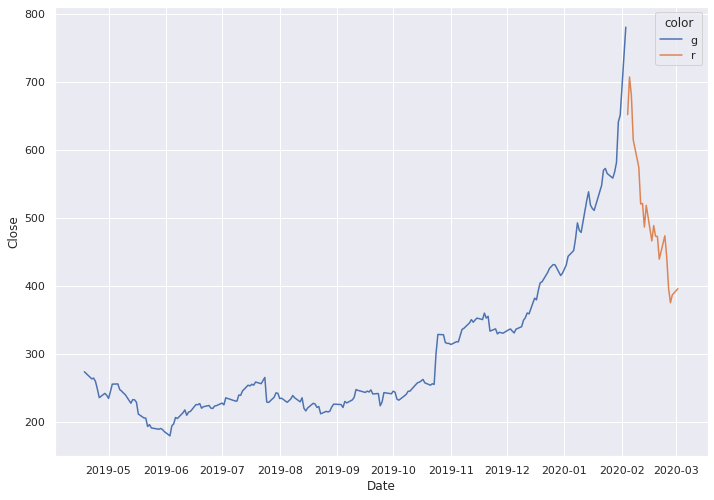

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
sns.set_theme()
sns.set(rc={'figure.figsize':(11.7,8.27)})

new_dates = result["data_v2"]["predict"]["Date"]
new_close = result["data_v2"]["predict"]["0.5"]
df_plot = df[["Date", "Close"]]
df_plot["color"] = "g"
df_plot = df_plot.append(
    pd.DataFrame({
        "Date": new_dates,
        "Close": new_close,
        "color": ["r" for _ in new_close]
    })
)

df_plot["Date"] = pd.to_datetime(df_plot["Date"])

sns.lineplot(
    data=df_plot,
    x="Date",
    y="Close",
    hue="color"
)